In [1]:
import torch
from torchvision.datasets import FashionMNIST
from torchvision.transforms import ToTensor, Compose, Lambda
from torch.utils.data import DataLoader
from  tqdm import tqdm

from UNet import ContextUNET
from DDPM import ContextDDPM
from utils import *

DEVICE="mps"

In [154]:
transform = Compose([
    ToTensor(),
    Lambda(lambda x: (x - 0.5) * 2)]
)

n_steps, min_beta, max_beta = 1000, 10 ** -4, 0.02  # Originally used by the authors
ddpm = ContextDDPM(ContextUNET(n_steps), n_steps=n_steps, min_beta=min_beta, max_beta=max_beta, device=DEVICE)

trainset = FashionMNIST("../../coding/Dataset", train=True, transform=transform, download=False)
dataloader = DataLoader(trainset, batch_size=64, shuffle=True)

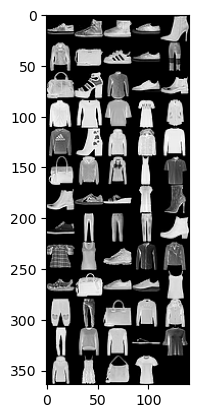

In [155]:
show_first_batch(dataloader)

In [156]:
checkpoints = torch.load("checkpoints/best_model_mnist_context.pkl")
ddpm.load_state_dict(checkpoints["model"])

<All keys matched successfully>

In [157]:
ddpm.generate_gif()

100%|██████████| 1000/1000 [00:22<00:00, 44.13it/s]
